In [1]:
import pandas as pd

# Assuming the job listings are in a CSV file
job_data = pd.read_csv("gsearch_jobs.csv")

# Check the first few rows to understand the structure
print(job_data.head())

   Unnamed: 0  index                                              title  \
0           0      0  Data Analyst - Remote! ($64663.00 - $96994.00 ...   
1           1      1                             Data Analyst - 7010605   
2           2      2                          SQL Data Analyst (Remote)   
3           3      3                                       Data Analyst   
4           4      4                       Senior Data Analyst (Remote)   

        company_name                 location  \
0       Talentify.io                Anywhere    
1  State of Missouri    Jefferson City, MO      
2  Futura Healthcare                Anywhere    
3                ATC         United States      
4     The Home Depot         United States      

                                              via  \
0                                    via LinkedIn   
1                                      via Indeed   
2                                    via Built In   
3                                    via L

In [3]:
# Remove NaN job descriptions if any
job_data = job_data.dropna(subset=['description'])

# Clean text: convert to lowercase, remove special characters, etc.
job_data['cleaned_description'] = job_data['description'].str.lower().replace(r'[^a-z\s]', '', regex=True)

#Check. If this returns an empty dataframe, it means the cleaning process worked correctly.
job_data[job_data['cleaned_description'].str.contains(r'[^a-z\s]', regex=True, na=False)]

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,cleaned_description


In [9]:
#What are the top hard skills that companies are looking for?
import re
from collections import Counter

# Define common hard skills in data science
hard_skills_pattern = r"\b(python|r|sql|excel|tableau|power bi|sas|hadoop|spark|tensorflow|keras|pytorch|scikit-learn|nlp|big data|statistics|machine learning|deep learning|data visualization|cloud computing|aws|azure|gcp|kubernetes|docker)\b"

# Function to extract hard skills from job descriptions
def extract_hard_skills(description):
    return re.findall(hard_skills_pattern, description)

# Apply to dataset
job_data['hard_skills'] = job_data['cleaned_description'].apply(extract_hard_skills)

# Flatten list and count frequency
hard_skills_counts = Counter([skill for sublist in job_data['hard_skills'] for skill in sublist])

# Convert to DataFrame
hard_skills_df = pd.DataFrame(hard_skills_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(hard_skills_df.to_string())  # Display all hard skills


                 Skill  Frequency
2                  sql      49509
7           statistics      25837
5                excel      25129
3               python      24791
6              tableau      23594
8             power bi      17075
11  data visualization      15983
4                    r      15026
0     machine learning      10163
1                  sas       7113
10               azure       6820
15                 aws       5442
13            big data       4205
12               spark       3651
14                 gcp       1619
17              hadoop       1577
9                  nlp       1138
18       deep learning        896
19          tensorflow        702
23     cloud computing        626
16              docker        607
20             pytorch        483
21          kubernetes        339
22               keras        186


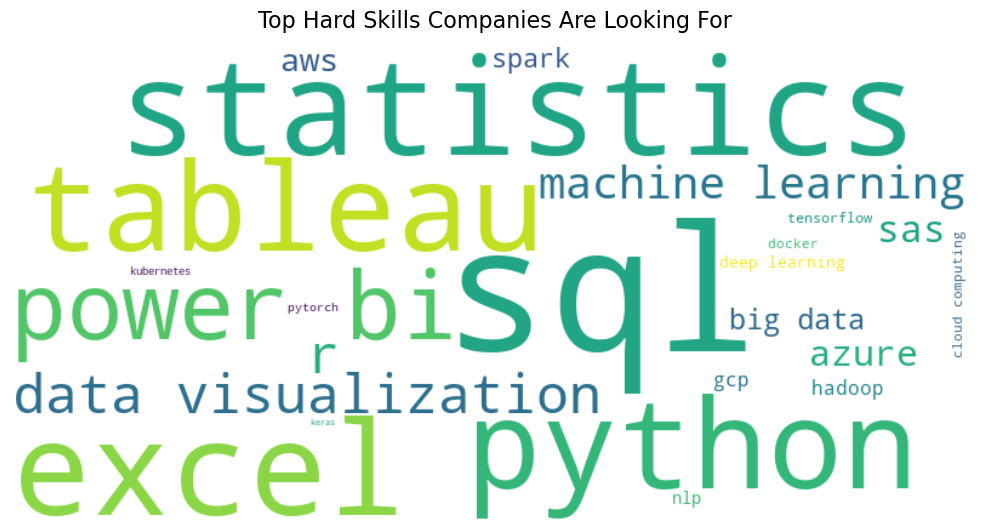

In [91]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the word cloud from the hard skill frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hard_skills_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes

# Add title
plt.title("Top Hard Skills Companies Are Looking For", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


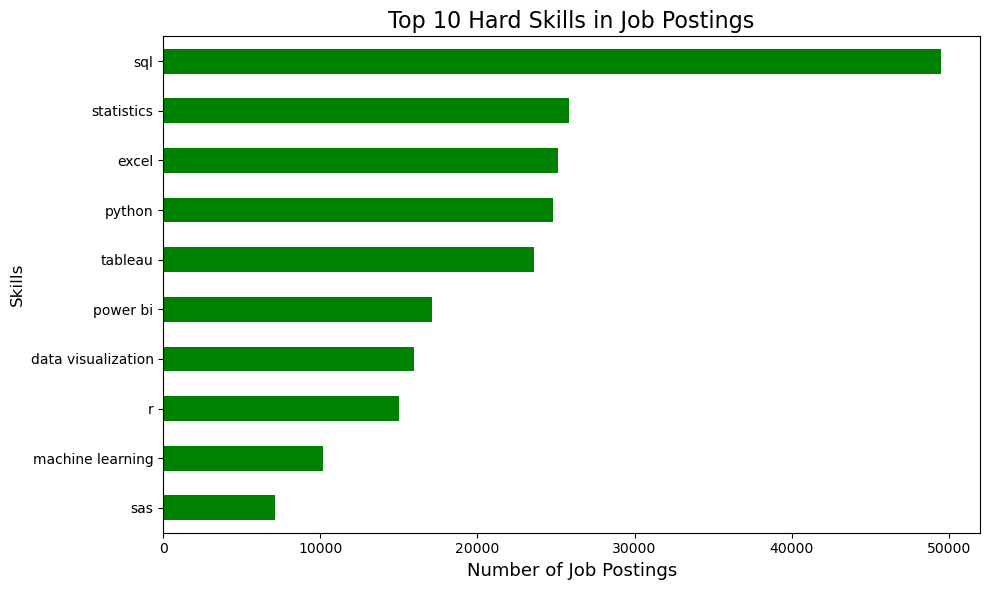

In [79]:
top_10_hard_skills = pd.Series(hard_skills_counts).sort_values(ascending=False).head(10)

# Create the bar plot for top 10 hard skills
plt.figure(figsize=(10, 6))
top_10_hard_skills.plot(kind='barh', color='green')

# Add title and labels
plt.title("Top 10 Hard Skills in Job Postings", fontsize=16)
plt.xlabel("Number of Job Postings", fontsize=13)
plt.ylabel("Skills", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
#What are the top soft skills that companies are looking for?
# Define common soft skills
soft_skills_pattern = r"\b(communication|teamwork|leadership|problem-solving|critical thinking|adaptability|creativity|collaboration|time management|attention to detail|decision making|empathy)\b"

# Function to extract soft skills
def extract_soft_skills(description):
    return re.findall(soft_skills_pattern, description)

# Apply function
job_data['soft_skills'] = job_data['cleaned_description'].apply(extract_soft_skills)

# Count occurrences
soft_skills_counts = Counter([skill for sublist in job_data['soft_skills'] for skill in sublist])

# Convert to DataFrame
soft_skills_df = pd.DataFrame(soft_skills_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(soft_skills_df.to_string())  # Display all soft skills

                  Skill  Frequency
0         communication      32434
3            leadership      18654
2         collaboration      10062
1   attention to detail       9016
5       decision making       4929
6     critical thinking       3440
4       time management       2309
7              teamwork       2094
10           creativity       1598
8          adaptability        740
9               empathy        406


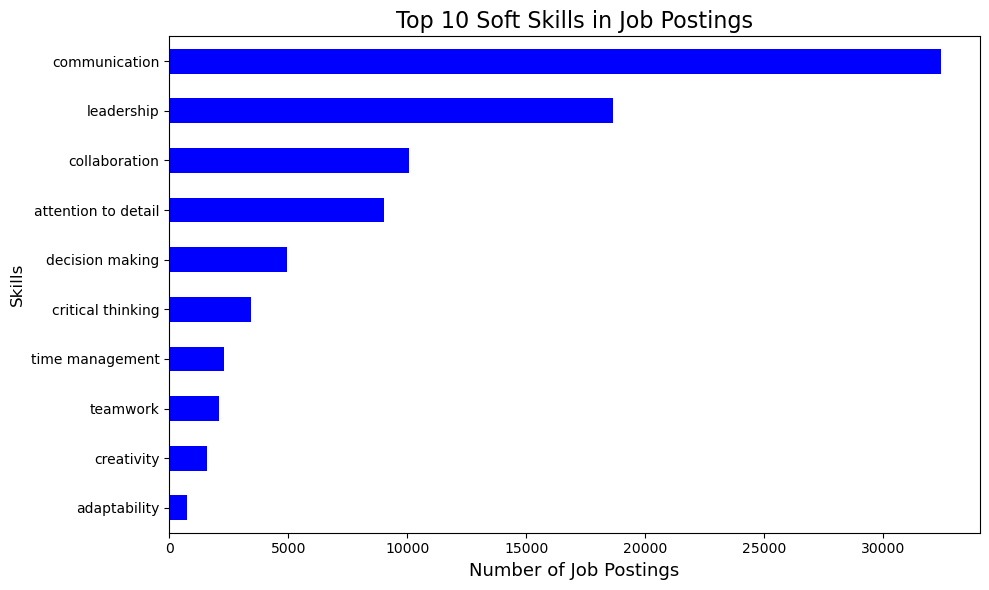

In [81]:
top_10_soft_skills = pd.Series(soft_skills_counts).sort_values(ascending=False).head(10)

# Reverse the order
top_10_soft_skills = top_10_soft_skills.iloc[::-1]

# Create the bar plot for top 10 hard skills
plt.figure(figsize=(10, 6))
top_10_soft_skills.plot(kind='barh', color='Blue')

# Add title and labels
plt.title("Top 10 Soft Skills in Job Postings", fontsize=16)
plt.xlabel("Number of Job Postings", fontsize=13)
plt.ylabel("Skills", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Count job postings by website
website_counts = job_data['via'].value_counts()

print(website_counts.to_string())  # Display all job posting websites

In [15]:
# Remove "via " dynamically from all values (case-insensitive)
job_data['via'] = job_data['via'].str.replace(r'(?i)^via ', '', regex=True)

# Count job listings by source
source_counts = job_data['via'].value_counts()

# Display results
print(source_counts.to_string())  # Displays all rows without truncation

via
LinkedIn                                                                                  21736
Upwork                                                                                     7443
BeBee                                                                                      6319
ZipRecruiter                                                                               3136
Trabajo.org                                                                                3028
Indeed                                                                                     1930
Snagajob                                                                                   1021
Adzuna                                                                                      842
Jobs Trabajo.org                                                                            825
Mysmartpros                                                                                 643
Built In                            

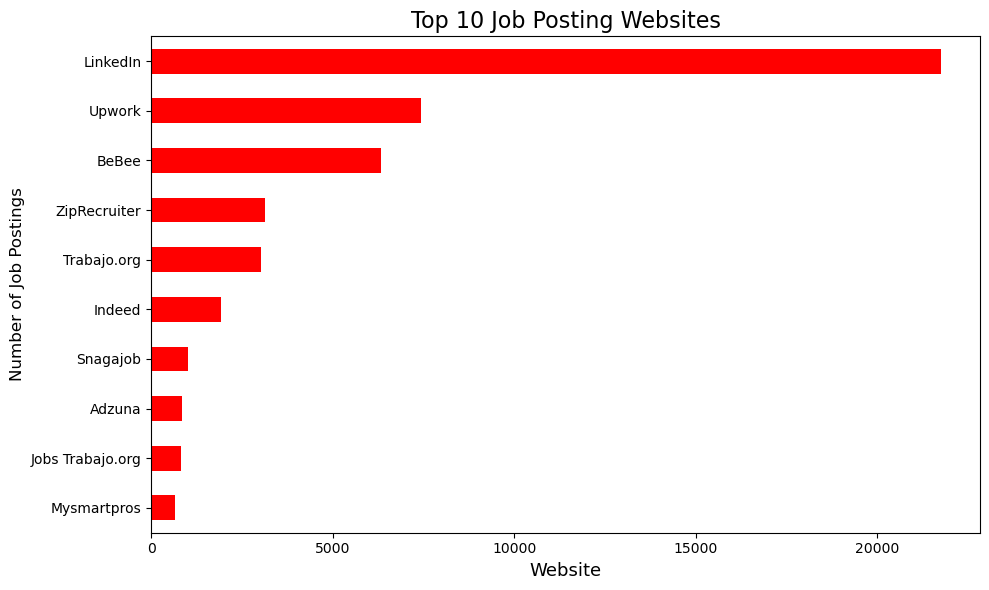

In [47]:
import matplotlib.pyplot as plt

# Get the top 10 job posting websites from the counts
top_10_websites = source_counts.head(10).sort_values(ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
top_10_websites.plot(kind='barh', color='Red')

# Add title and labels
plt.title("Top 10 Job Posting Websites", fontsize=16)
plt.xlabel("Website", fontsize=13)
plt.ylabel("Number of Job Postings", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

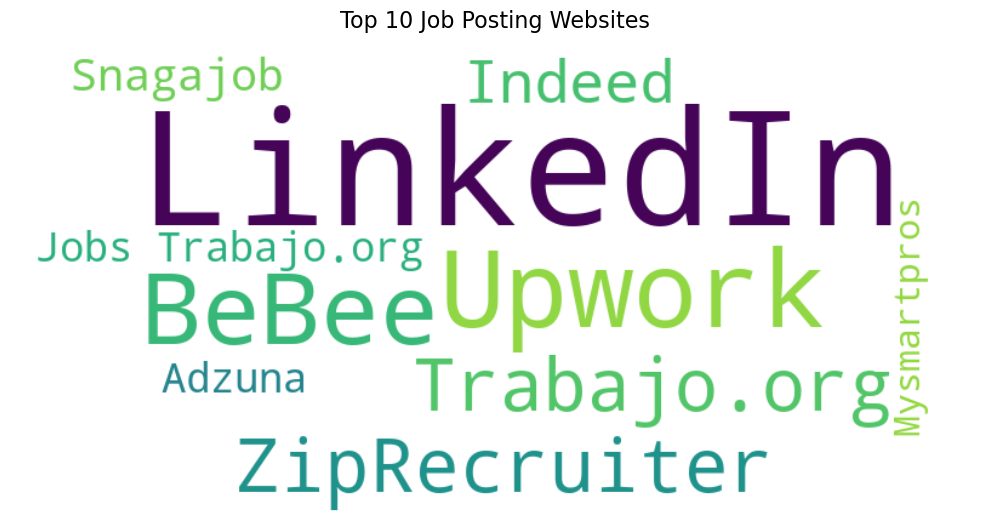

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of the top 10 websites and their counts
top_10_dict = top_10_websites.to_dict()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # No axis for a clean look

# Add title
plt.title("Top 10 Job Posting Websites", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()
